<a href="https://colab.research.google.com/github/prolegosi/Covid-19-TimeLine-clusterization/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%BA%D0%BE%D0%BD%D1%81%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%86%D0%B8%D1%8F_170123_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Телеграм-бот

In [ ]:
!pip install pyTelegramBotAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.9/219.9 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.9.0-py3-none-any.whl size=203107 sha256=89e6e9d6ee952fc4af1fe667d89f96dd88a8c96c807579e77d5d0643a9292b2c
  Stored in directory: /root/.cache/pip/wheels/95/a7/fd/f667b71e29e3f64f239f30195efc39de642e72f8a47a6fcd8d
Successfully built pyTelegramBotAPI


In [ ]:
import cv2
import telebot

Я сделал отдельный файл datatoken.py для токена

In [ ]:
from datatoken import TOKEN

bot = telebot.TeleBot(TOKEN)

In [ ]:
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
@bot.message_handler(content_types=['photo'])
def photographio(message):
  print(message)
  file = bot.get_file(message.photo[-1].file_id)
  bot.send_message(message.from_user.id, 'Фото получил. Обрабатываю!')
  dfile = bot.download_file(file.file_path)
  fimg = message.photo[-1].file_id + '.png'
  with open(fimg, 'wb') as new_file:
     new_file.write(dfile)
  new_file.close()
  img = cv2.imread(fimg)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face.detectMultiScale(gray, 1.1, 19)
  if type(faces) != type((1, )):
    img = cv2.rectangle(img, (faces[0][0], faces[0][1]), (faces[0][2]+faces[0][0], faces[0][3]+faces[0][1]), (0, 255, 0), 2)
  
  cv2.imwrite(fimg, img)
  with open(fimg,'rb') as fil:
        byte = fil.read()
  print('отправлено')
  bot.send_photo(message.from_user.id,  byte)

bot.infinity_polling()

{'content_type': 'photo', 'id': 1375, 'message_id': 1375, 'from_user': {'id': 280879450, 'is_bot': False, 'first_name': 'Evgeniia', 'username': 'emistonova', 'last_name': 'Mistonova', 'language_code': 'ru', 'can_join_groups': None, 'can_read_all_group_messages': None, 'supports_inline_queries': None, 'is_premium': None, 'added_to_attachment_menu': None}, 'date': 1673968492, 'chat': {'id': 280879450, 'type': 'private', 'title': None, 'username': 'emistonova', 'first_name': 'Evgeniia', 'last_name': 'Mistonova', 'is_forum': None, 'photo': None, 'bio': None, 'join_to_send_messages': None, 'join_by_request': None, 'has_private_forwards': None, 'has_restricted_voice_and_video_messages': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'permissions': None, 'slow_mode_delay': None, 'message_auto_delete_time': None, 'has_protected_content': None, 'sticker_set_name': None, 'can_set_sticker_set': None, 'linked_chat_id': None, 'location': None, 'active_usernames': None, 'emo

2023-01-17 15:36:46,970 (__init__.py:955 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
ERROR:TeleBot:Infinity polling: polling exited
2023-01-17 15:36:46,973 (__init__.py:955 MainThread) ERROR - TeleBot: "Break infinity polling"
ERROR:TeleBot:Break infinity polling


Современные модели машинного обучения на сверточных нейросетях позволяют детектировать объекты на изображениях в режиме реального времени. Давайте рассмотрим работутаких моделей на примере [YOLOv4](https://habr.com/ru/post/503200/). В настоящий момент есть уже более новые версии, но четвертая версия все еще хороша.

## Как это работает?

![image](https://drive.google.com/uc?id=1cGHqO0E-42SjWYAF4ZK02lT0E24Xocmu)

Нейросеть разделяет картинку на несколько несколько частей, внутри которых детектируются объекты. Каждая часть описывается вектором из некоторого количества чисел. Первое число показывает, есть ли какой-то объект (если нет, то число равно 0 и остальных чисел нет). Наличие объекта дает единицу в качестве первого числа. Затем идут два числа-координаты центра объекта. Два следующих числа - высота и ширина объекта. Последние числа - это классы (собака или человек).

Подробнее про принцип работы YOLO смотрите [видео](https://www.youtube.com/watch?v=ag3DLKsl2vk) или читайте [статью](https://habr.com/ru/post/503200/).

### Попробуем посмотреть, как это работает

In [ ]:
# импортируем нужные модули

import cv2_imshow
import cv2
import numpy as np
import PIL
import time


## Скопируем и установим Darknet для YOLOv4
Мы используем код из репозитория Алексея Бочковского, который разработал YOLOv4, работая в Интел.

In [1]:
# скопируем репозиторий darknet 
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [2]:
# изменим кое-какие настройки
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [3]:
# соберем получившееся решение, чтобы запускать файл darknet.py 
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |            

In [4]:
# скачаем файл весов модели yolov4, натренированный определять 80 классов объектов 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2023-01-21 09:24:41--  https://docs.google.com/uc?export=download&confirm=t&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.139, 108.177.119.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cj5b4qgmkoh6ikmt4vekp3ra9fdqcf3b/1674293025000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=91058d32-0133-4738-9f5d-6f6328adf045 [following]
--2023-01-21 09:24:41--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cj5b4qgmkoh6ikmt4vekp3ra9fdqcf3b/1674293025000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=91058d32-0133-4738-9f5d-6f6328adf045
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 173.194.69.1

## Darknet для Python
Чтобы использовать YOLOv4 на Python мы используем некоторые встроенные в darknet.py функции. Для более детального изучения посмотрите исходный код файла darknet.py

In [ ]:
# импортируем darknet функции для детектирования объектов
from darknet import *
# загрузим YOLOv4 
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

# darknet_helper функция для детектирования объектов на изображении
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # пересчет координат границ объектов, чтобы можно было отобразить на кадре
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # запуск модели
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

## YOLOv4. Пример работы
Проверим работу на тестовой картинке.

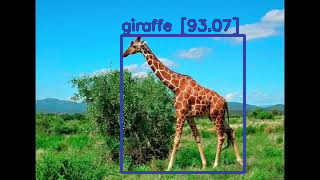

In [ ]:
# запустим тест на картинке person.jpg, которая есто в репозитории
image = cv2.imread("/content/mqdefault.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

In [ ]:
detections

[('giraffe',
  '93.07',
  (292.466064453125, 295.4597473144531, 196.916015625, 390.5987548828125))]

In [ ]:
x = 'Вася'
print(f'Привет, {x}!')

Привет, Вася!


## Теперь проверим на видео
Причем сразу на прямой трансляции. Воспользуемся ресурсом с [псковскими вебкамерами](https://pskov.camera/).

In [ ]:
import time
camera = cv2.VideoCapture('https://citycams.pskovline.ru:8443/cam3/mpegts') 
frame_width = int(camera.get(3))
frame_height = int(camera.get(4))
start = time.time()
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while True:
  ok, frame = camera.read()
  detections, width_ratio, height_ratio = darknet_helper(frame, width, height)
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(frame, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(frame, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
  out.write(frame)
  now = time.time()
  if now - start > 20:
    break


In [ ]:
detections

[('person',
  '55.47',
  (24.435205459594727, 319.915283203125, 23.17578125, 106.16825103759766)),
 ('car',
  '59.19',
  (316.80804443359375,
   171.97268676757812,
   54.26551055908203,
   31.974716186523438)),
 ('car',
  '60.07',
  (181.1465606689453,
   122.32069396972656,
   9.89918327331543,
   11.947710990905762)),
 ('car',
  '70.93',
  (165.536865234375,
   128.43594360351562,
   22.0257511138916,
   25.668930053710938)),
 ('car',
  '71.47',
  (424.8826599121094,
   192.4902801513672,
   42.056209564208984,
   38.35530090332031)),
 ('car',
  '72.76',
  (357.3650817871094,
   149.52120971679688,
   45.32880783081055,
   32.15076446533203)),
 ('car',
  '73.46',
  (352.2059326171875,
   171.40121459960938,
   42.02595901489258,
   39.371559143066406)),
 ('car',
  '85.94',
  (392.5819091796875,
   202.32579040527344,
   65.71666717529297,
   45.275089263916016)),
 ('car',
  '86.43',
  (257.1130676269531,
   159.05950927734375,
   46.35875701904297,
   35.155094146728516)),
 ('car',


# Развертывание проектов с помощью Streamlit
В рамках своего задания вы можете использовать любые доступные инструменты. Мы предлагаем в качестве одного из вариантов графической оболочки использовать [Streamlit](https://streamlit.io/). Это удобный инструмент для быстрого создания веб-приложений в области Data Science.

В качестве примера мы рассмотрим приложение, которое берет данные из Гугл таблицы и строит графики по данным, представленным в таблице.
Для начала установим Streamlit.

In [ ]:
!pip install -q streamlit==1.15.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.9 MB/s eta 0:00:00


Для проверки создадим простейшее приложении. Для этого сделаем файл командой %%writefile

In [ ]:
%%writefile streamlit_app.py 
import streamlit as st
st.write(' # Привет, разработчик на Пайтоне!')

Writing streamlit_app.py


Запустим файл и перейдем по появившейся ссылке. Для этого установим и используем модуль [localtunnel](https://www.npmjs.com/package/localtunnel). Он служит для предоставления доступа через Интернет приложений, запущенных локально. Мы запустим наше приложение streamlit локально на виртуальной машине Google Colab и откроем доступ по ссылке.

In [ ]:
!streamlit run /content/darknet/streamlit_app.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.143.180.69:8501

npx: installed 22 in 4.086s
your url is: https://nasty-birds-clean-34-143-180-69.loca.lt
  Stopping...
^C


По отдельности все работает хорошо. Теперь нужно все собрать в один файл и заставить работать через streamlit. Последний обладает прекрасными инструментами для интерактивной визуализации, поэтому не будем использовать matplotlib, а задействуем [Altair](https://altair-viz.github.io/). Помимо Altair в streamlit есть множество других инструментов визуализации и создания интерактивного интерфейса (кнопки, поля ввода, слайдеры и многое другое). С ними можно познакомиться по ссылке.

In [ ]:
%%writefile app.py
import streamlit as st
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import gspread
from google.auth import default
creds, _ = default()
import altair as alt
from sklearn.cluster import KMeans
gc = gspread.authorize(creds)

sh = gc.open_by_key('11QoScnd-Oj5PML63SdpP5LKIwmNH3Si9j3uTFrTiV64')
worksheet_list = sh.worksheets()
ws = sh.worksheet(worksheet_list[0].title)
rows = ws.get_all_values()
print(rows)
columns = rows[0]
df = pd.DataFrame.from_records(rows[1:], columns=columns)
for i, row in df.iterrows():
  for j in range(4, 9):
    if type(row[j]) == str and row[j] != '':
      if row[j][0] != '$':
        pass
      else:
        df.iloc[i, j] = float(row[j][1:])
df = df[df['Cheapest 1GB for 30 days (USD)'] != '']
cleardf = pd.DataFrame([], columns=columns)
c = 0
for i, row in df.iterrows():
  for j in range(4, 9):
    if type(row[j]) != float:
      break
    if j == 8:
      cleardf.loc[c] = row
      c += 1
model = KMeans(n_clusters=3)
model.fit(cleardf.iloc[:, 4:9])
cleardf['Labels'] = model.labels_
st.write(' # Кластеризация стран по стоимости Интернета')
source = alt.Chart(cleardf).mark_circle(size=60).encode(
    x='Cheapest 1GB for 30 days (USD)',
    y='Most expensive 1GB (USD)',
    color='Labels',
    tooltip=['Name', 'Country code', 'Continental region']
).interactive()
st.altair_chart(source)

Writing app.py


In [ ]:
!streamlit run /content/darknet/app.py & npx localtunnel --port 8501

[############......] - refresh-package-json:localtunnel: timing action:finalize

npx: installed 22 in 2.263s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.143.180.69:8501

your url is: https://common-states-work-34-143-180-69.loca.lt
2023-01-17 16:26:48.210 No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable
2023-01-17 16:26:48.775 No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable
[['Country code', 'Name', 'Continental region', 'NO. OF Internet Plans', 'Average price of 1GB (USD)', 'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (USD)', 'Average price of 1GB (USD at the start of 2021)', 'Average price of 1GB (USD – at start of 2020)'], ['IL', 'Israel', 'NEAR EAST', '27', '$0.05', '$0.02', '$20.95', '$0.11', '$0.90'], ['KG', 'Kyrgyzstan',

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()


gc = gspread.authorize(creds)

Вот несколько интересных примеров проектов, сделанных на streamlit:
- [Build a Website in only 12 minutes using Python & Streamlit](https://www.youtube.com/watch?v=VqgUkExPvLY)
- [I tried to build a Python Machine Learning Streamlit App in 7 Minutes | Coding Challenge](https://www.youtube.com/watch?v=Ebb4gUI2IpQ)
- [Как создать приложение Streamlit (учебник Streamlit для начинающих) - Часть 1](https://www.youtube.com/watch?v=-IM3531b1XU)

Если у вас останется время, вы можете попробовать полноценно развернуть проект Streamlit Cloud. Для этого нужно свой проект разместить на GitHub и следовать [инструкциям](https://docs.streamlit.io/streamlit-cloud/get-started/deploy-an-app).